In [1]:
from analyzer import GaiaAnalyzer
from analyzer import MISTFitter
from downloader import LightCurveExtractor

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

Holoviews not imported. Some visualizations will not be available.
/Users/jeremyng/conda/envs/iso_arm/lib/python3.9/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(


In [2]:
# some statements to make the figures look nicer 
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                    
                     'font.family': 'Serif',
                     'figure.figsize': (10, 6)
                    })

In [3]:
gaia_analyzer = GaiaAnalyzer(filename='gaia.csv')
gaia_analyzer.get_data()

df = gaia_analyzer.get_data().copy()
df.head()

,source_id,ra,dec,parallax,parallax_unc,pmra,pmra_error,pmdec,pmdec_error,G_mag,...,logg,logg_gspspec_lower,logg_gspspec_upper,phot_bp_rp,BP_mag_unc,RP_mag_unc,G_mag_unc,teff_unc,logg_unc,distance_unc
0,3763976194792448,45.276791,5.006404,7.954515,0.019097,24.526128,0.023404,-45.727224,0.017959,9.279200,...,3.95,3.78,4.06,0.720543,0.000650,0.000533,0.000192,2.645996,0.14,0.308952
1,11352324413414016,52.860503,7.796339,8.422533,0.035354,24.168420,0.050407,-50.147355,0.035200,13.830488,...,NaN,NaN,NaN,2.155826,0.001755,0.000591,0.000444,4.344116,NaN,3.102100
2,19817739313090688,39.568739,7.965070,12.499952,0.160662,43.608250,0.172182,-71.069385,0.178885,18.442486,...,NaN,NaN,NaN,0.715567,0.035904,0.030820,0.002122,NaN,NaN,NaN
3,43733079289895424,56.558523,17.154376,18.583617,0.023517,49.660663,0.026018,-111.754468,0.019403,12.016204,...,NaN,NaN,NaN,2.040105,0.006811,0.003703,0.001573,NaN,NaN,NaN
4,46438771249859840,61.218048,17.464281,7.537225,0.097988,18.629909,0.107982,-46.349503,0.063953,13.154690,...,5.04,4.60,5.20,2.051896,0.002722,0.001453,0.000786,11.991455,0.30,1.777851


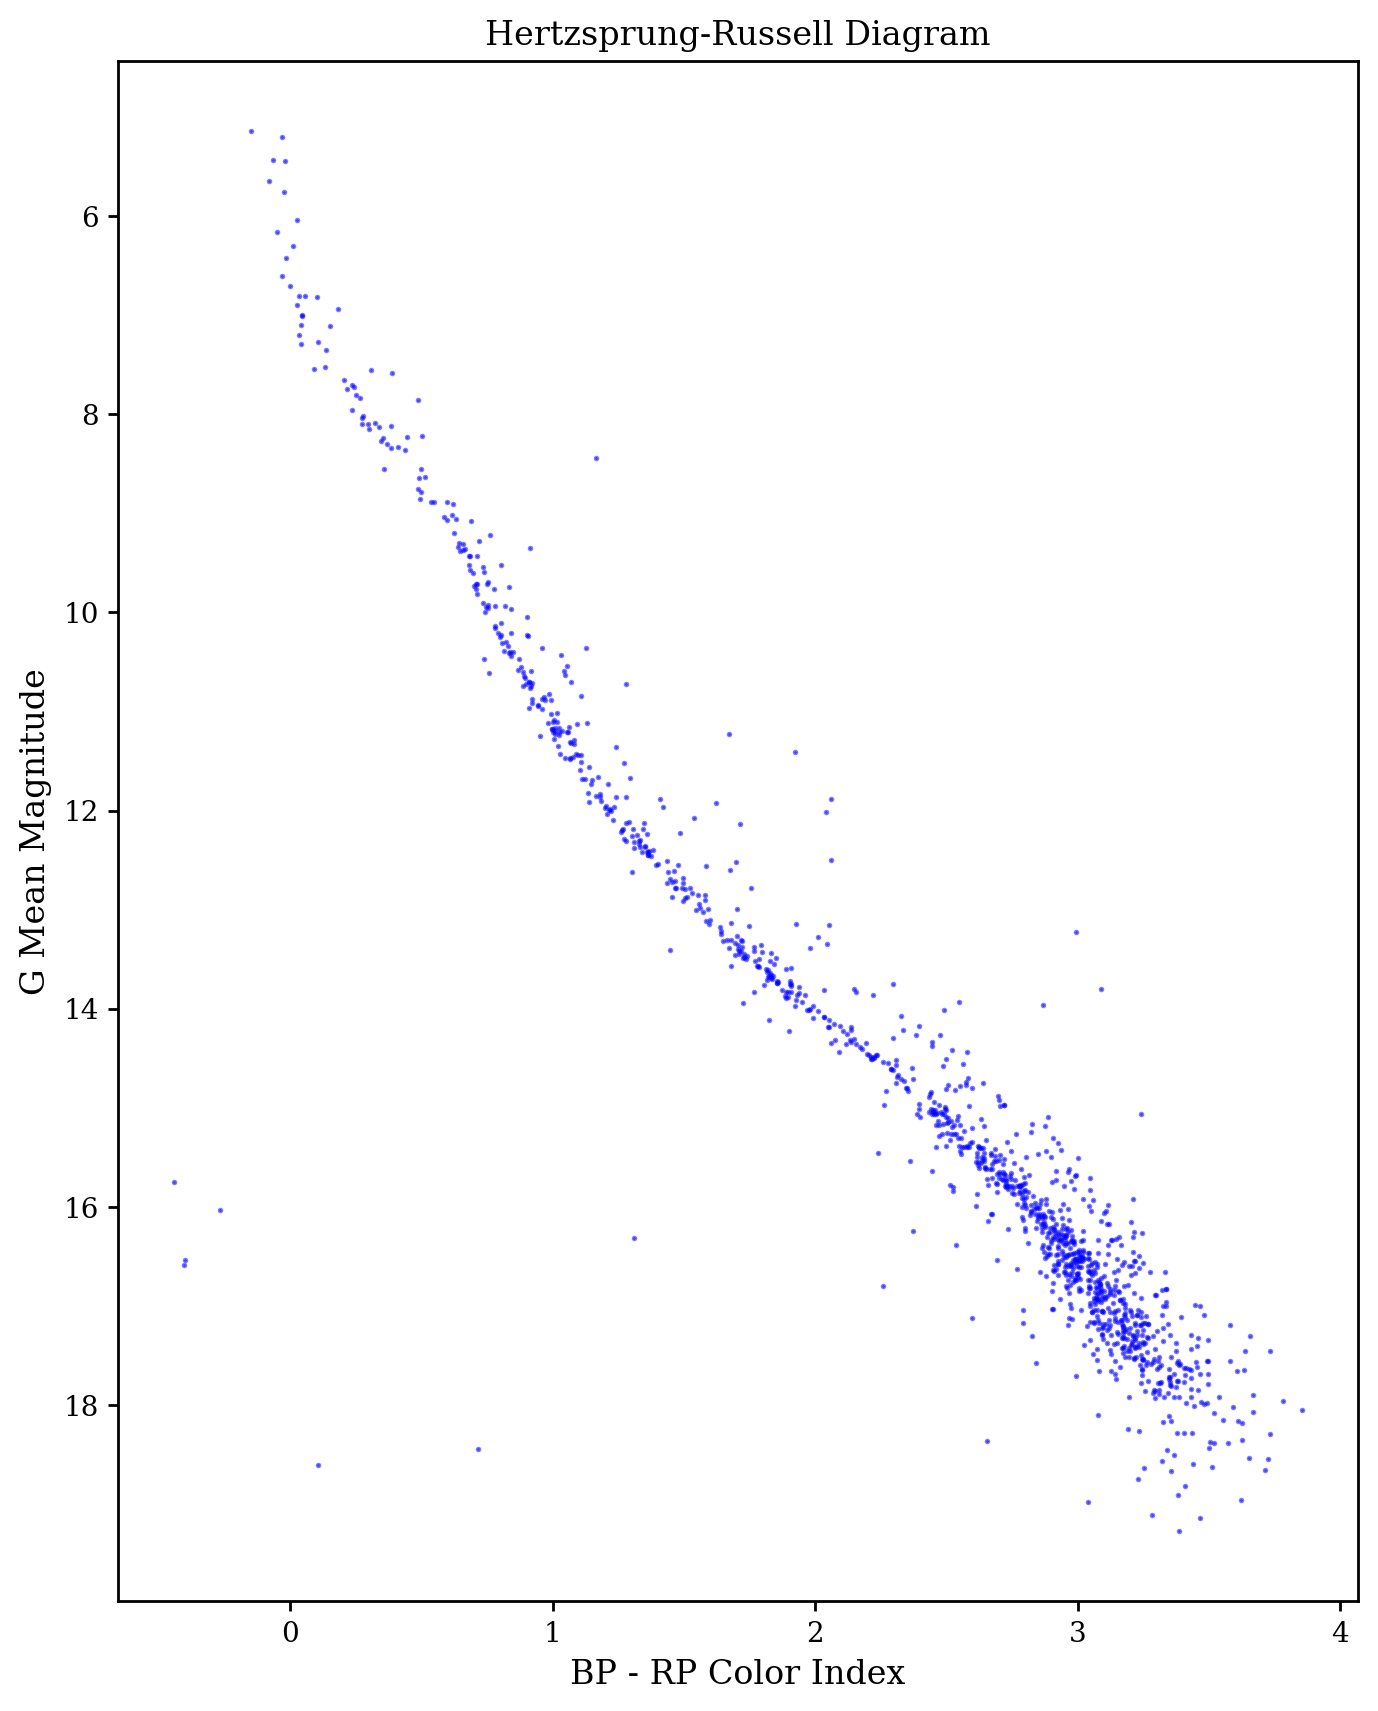

(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'Hertzsprung-Russell Diagram'}, xlabel='BP - RP Color Index', ylabel='G Mean Magnitude'>)

In [4]:
gaia_analyzer.plot_hr_diagram(show=True)

In [57]:
fitter = MISTFitter(data=df, age_range=(70e6, 160e6))

In [ ]:
sampler = fitter.sample_cluster(n_walkers=40, n_burn=1000, n_steps=3000, seed=123)

  1%|          | 7/1000 [00:01<03:55,  4.22it/s]

Median cluster parameters:
Age=1.37e+08 yr, [Fe/H]=0.20, Distance=118.4 pc, A_V=0.11


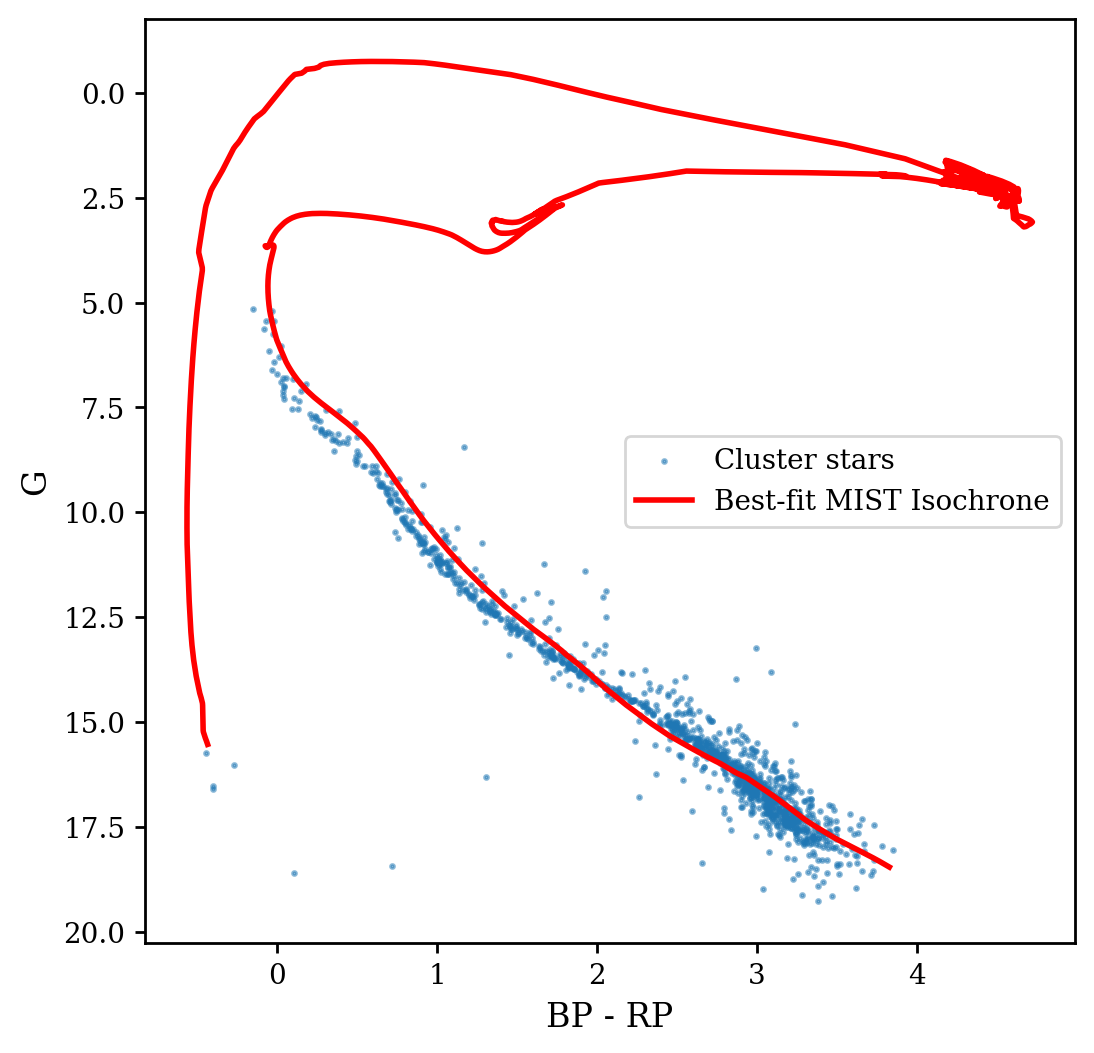

In [59]:
import numpy as np

# Step 3: Inspect posterior
samples = sampler.get_chain(flat=True)
median_params = np.median(samples, axis=0)
print(f"Median cluster parameters:\nAge={median_params[0]:.2e} yr, [Fe/H]={median_params[1]:.2f}, "
      f"Distance={median_params[2]:.1f} pc, A_V={median_params[3]:.2f}")

# Step 4: Plot best-fit isochrone
fitter.plot_best_fit_isochrone(median_params)

/var/folders/12/zdvhzg650g17gbnt14_55w_m0000gn/T/ipykernel_82371/3925245560.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  isochrone_df = pd.read_csv('mist_isochrone_140Myr.dat', delim_whitespace=True, comment='#')


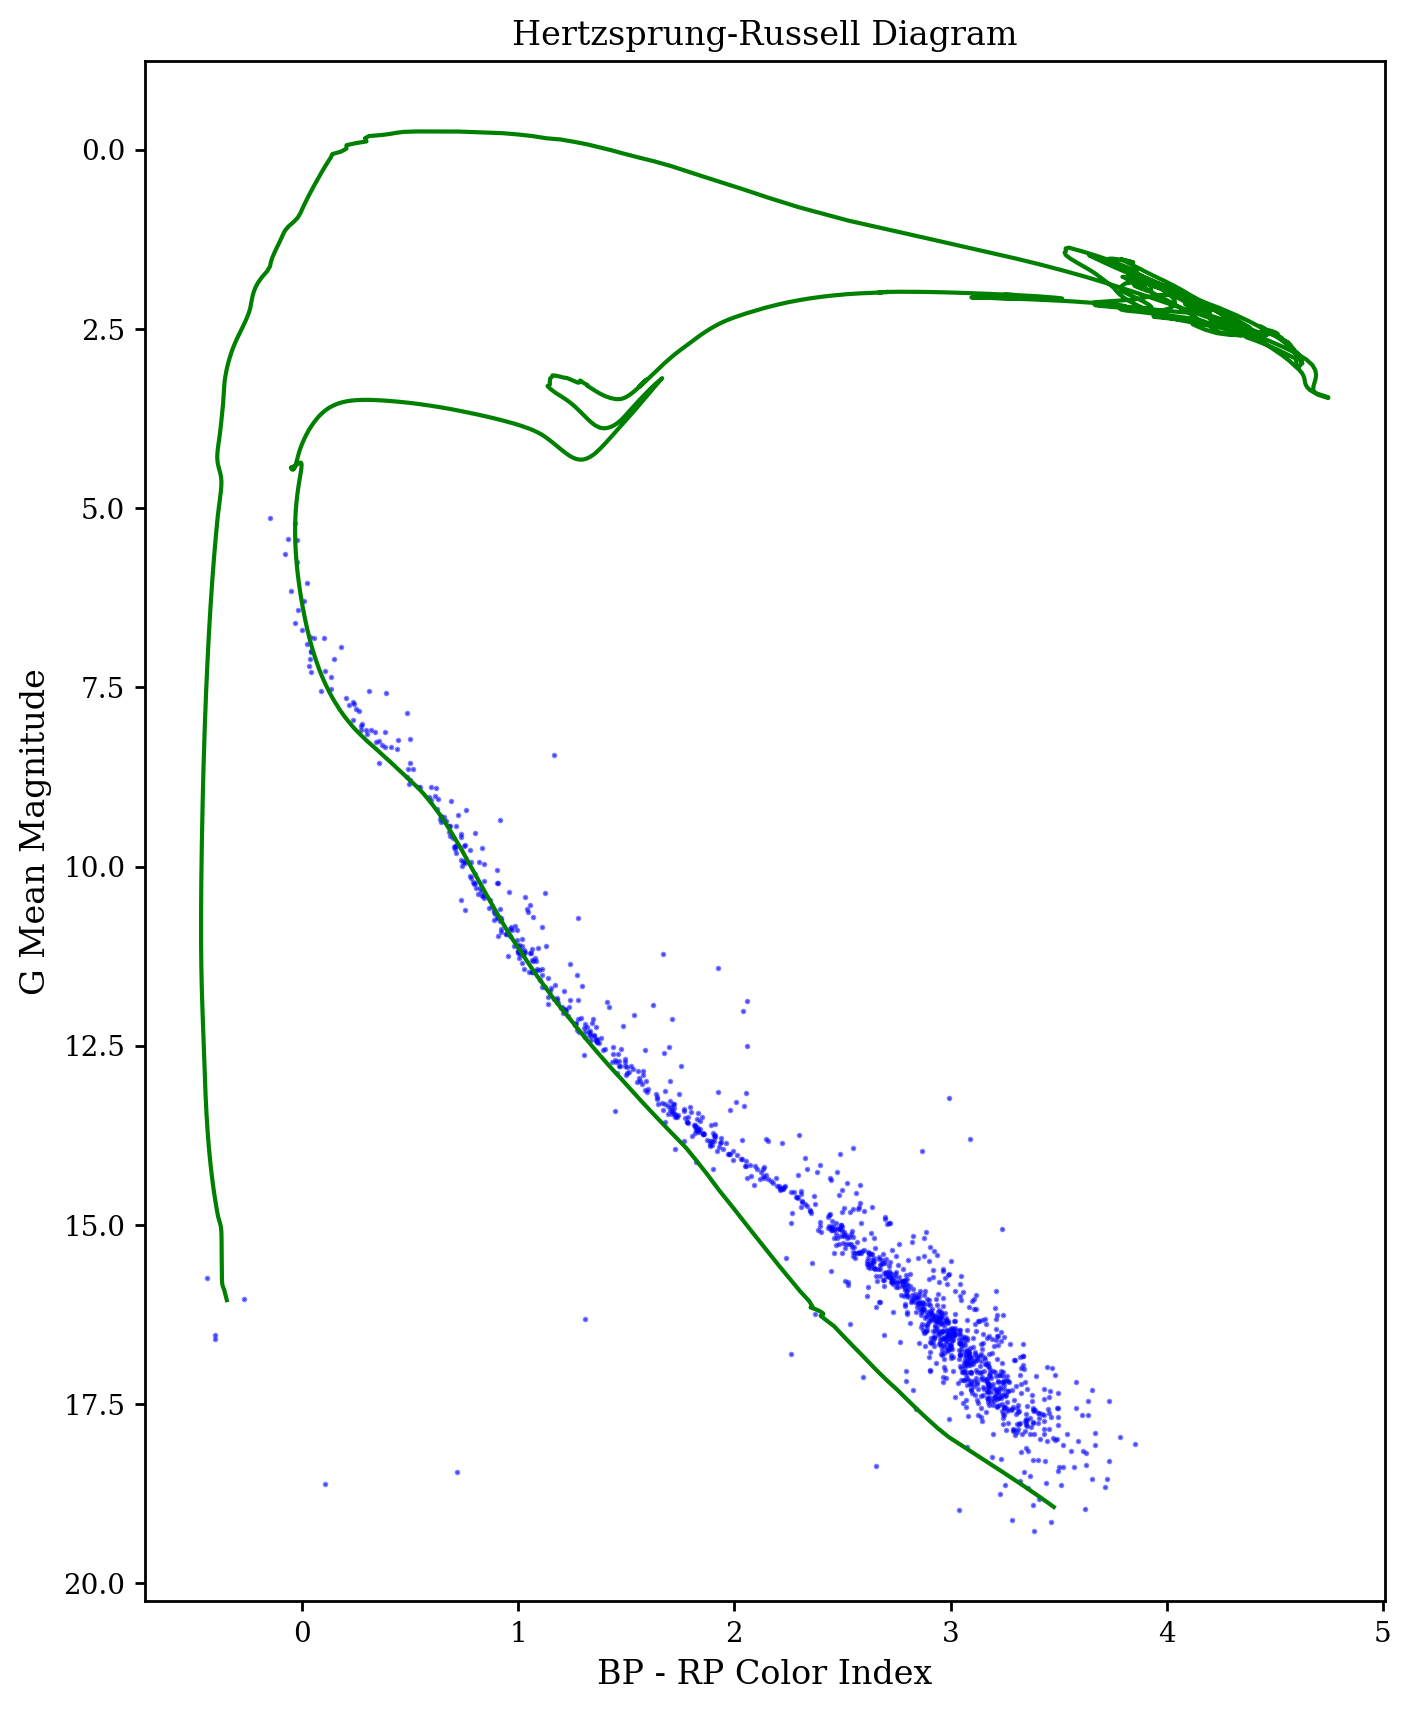

In [47]:
# Testing using actual isochrone
import pandas as pd

isochrone_df = pd.read_csv('mist_isochrone_140Myr.dat', delim_whitespace=True, comment='#')
fig, ax = gaia_analyzer.plot_hr_diagram(show=False)

isochrone_df['color'] = isochrone_df['Gaia_BP_EDR3'] - isochrone_df['Gaia_RP_EDR3'] + 0.15
isochrone_df['magnitude'] = isochrone_df['Gaia_G_EDR3'] + 6

ax.plot(isochrone_df['color'], isochrone_df['magnitude'], color='green', label='Isochrone')
plt.show()